In [25]:
import torch
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
# loading climatologies

prism = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/correct/prec_03_PRISM.nc')
worldclim = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/correct/prec_03_WorldClim_coarse_focal_min.nc')
# daymet = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/correct/prec_03_Daymet_coarse_focal.nc')
coast = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/coast.nc')
dem = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/DEM.nc')
lat = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/lat.nc')
lon = xr.open_dataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/lon.nc')
landsea_wc = xr.open_mfdataset('C:/Users/SBEALE/Desktop/Cropped_Coarsened_WRF_PRISM/no_overlap/correct/WorldClim_mask_coarse.nc')

In [27]:
# cropping to BC prism 

# worldclim = worldclim.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
# landsea_wc = landsea_wc.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
# prism = prism.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
# dem = dem.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
# lat = lat.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
# lon = lon.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))
# coast = coast.sel(longitude=slice(-140.795, -114), latitude=slice(65, 47.8))

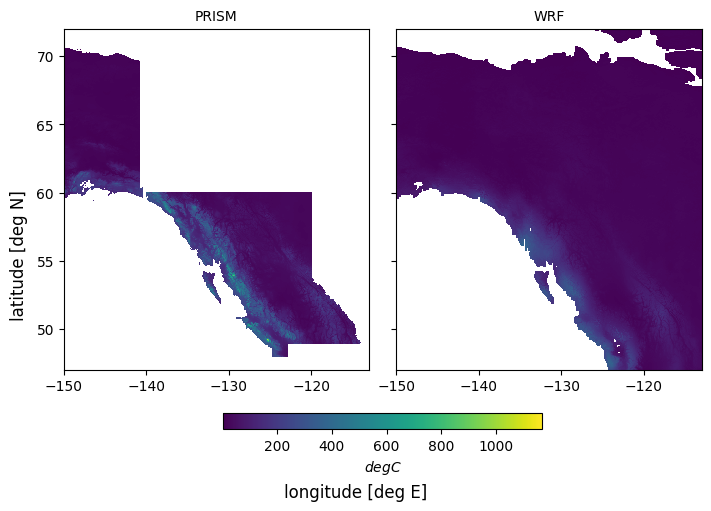

In [28]:
fig, ax = plt.subplots(1, 2, layout='constrained', figsize=(7, 5), sharex=True, sharey=True)

pc1 = ax[0].pcolormesh(prism.longitude, prism.latitude, prism.prec, cmap='viridis', vmin=np.nanmin(prism.prec), vmax=np.nanmax(prism.prec), label=r'$m$')
ax[0].set_title(f'PRISM', fontsize='medium', loc='center')

pc1 = ax[1].pcolormesh(worldclim.longitude, worldclim.latitude, worldclim.prec, cmap='viridis', vmin=np.nanmin(prism.prec), vmax=np.nanmax(prism.prec), label=r'$m$')
ax[1].set_title(f'WRF', fontsize='medium', loc='center')

# pc2 = ax[2].pcolormesh(worldclim.longitude, worldclim.latitude, prism.prec.values-worldclim.prec.values, cmap='RdBu', label=r'$m$')
# ax[2].set_title(f'PRISM-WRF', fontsize='medium', loc='center')

fig.supylabel('latitude [deg N]')
fig.supxlabel('longitude [deg E]')

fig.colorbar(pc1, shrink=0.5, aspect=20, location='bottom', ax=ax[0:2], label=r'$deg C$')

In [29]:
prism_prec = prism['prec']
worldclim_prec = worldclim['prec']
# daymet_prec = daymet['prec']
coast_dist = coast['dist']
dem_dem = dem['dem']
lat_lat = lat['lat']
lon_lon = lon['lon']

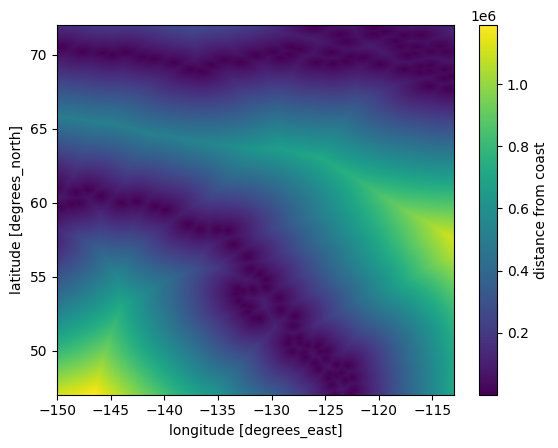

In [30]:
coast.dist.plot(cmap='viridis')

In [31]:
stand = pd.read_csv('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_1/standardization.csv')
stand

,var,clim,mean,std
0,prec,prism,130.139250,113.096130
1,prec,worldclim,75.190380,53.290344
2,dist from coast,prism,131896.250000,84912.450000
3,dem,prism,985.682000,741.275200
4,lat,prism,-140.527440,3.221131
5,lon,prism,60.533867,1.505895


In [32]:
# standardizing all variables 
prism['prec'] = (prism_prec - stand['mean'][0])/stand['std'][0]
worldclim['prec'] = (worldclim_prec - stand['mean'][1])/stand['std'][1]
# daymet['prec'] = (daymet_prec - stand['mean'][2])/stand['std'][2]
coast['dist'] = (coast_dist - stand['mean'][2])/stand['std'][2]
dem['dem'] = (dem_dem - stand['mean'][3])/stand['std'][3]
lat['lat'] = (lat_lat - stand['mean'][4])/stand['std'][4]
lon['lon'] = (lon_lon - stand['mean'][5])/stand['std'][5]

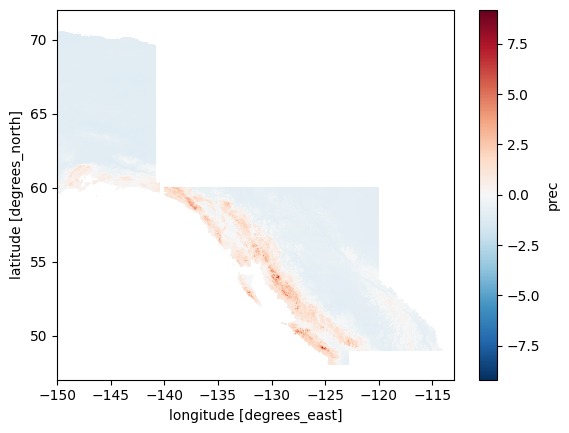

In [33]:
prism.prec.plot()

In [34]:
worldclim.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_1/worldclim_large.nc')
landsea_wc.WorldClim_mask_coarse.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_1/landsea_large.nc')
# daymet.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/daymet_large.nc')
coast.dist.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_1/coast_large.nc')
lat.lat.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_1/lat_large.nc')
lon.lon.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_1/lon_large.nc')
dem.dem.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_1/dem_large.nc')
prism.prec.to_netcdf('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_1/prism_large.nc')

In [35]:
x = xr.open_dataset('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/ak_bc_prism_fill_1/worldclim_large.nc')

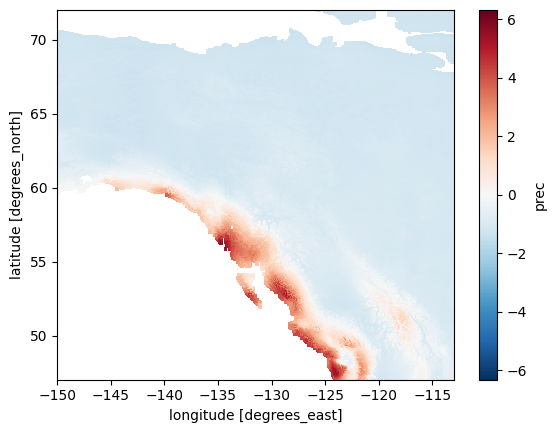

In [36]:
x.prec.plot()

In [13]:
y = xr.open_dataset('C:/Users/SBEALE/Desktop/GAN Data/prec/worldclim/march_nonan_BC_worldclim_daymet/prism_large.nc')

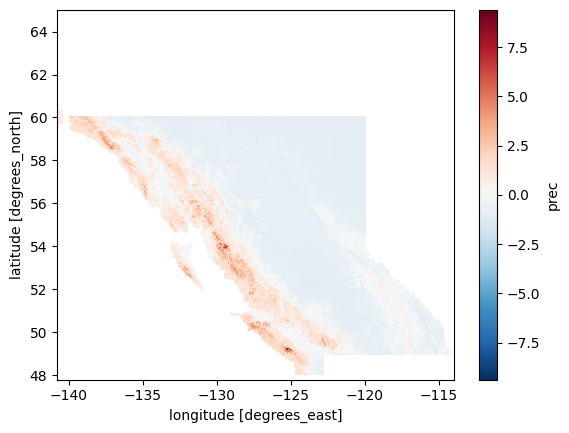

In [14]:
y.prec.plot()

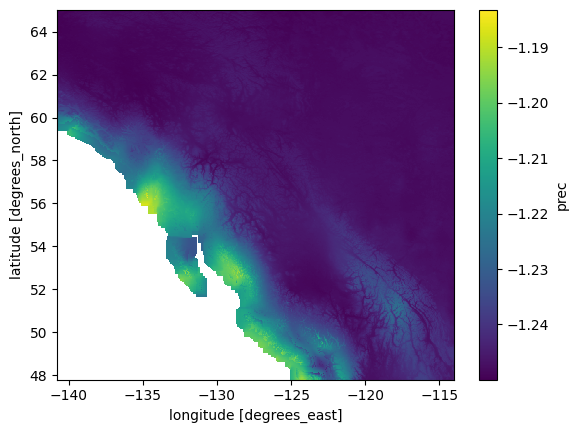

In [15]:
x = (x.prec - stand['mean'][1])/stand['std'][1]
x.plot(cmap='viridis')

In [16]:
z = x-y

ValueError: Cannot apply_along_axis when any iteration dimensions are 0

In [ ]:
z

In [ ]:
z.prec.plot(cmap='viridis')